# Talk of the Town Evaluation

In [7]:
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
from talktown.simulation import Simulation

In [3]:
# Generate a town!
start_time = time.time()
sim = Simulation()  # Objects of the class Simulation are Talk of the Town simulations
# Simulate from the date specified as the start of town generation to the date specified
# as its terminus; both of these dates can be set in config/basic_config.py
try:
    sim.establish_setting()  # This is the worldgen procedure; it will simulate until the date specified in basic_config.py
    town = sim.town
except KeyboardInterrupt:  # Enter "ctrl+C" (a keyboard interrupt) to end worldgen early
    # In the case of keyboard interrupt, we need to tie up a few loose ends
    sys.stdout.flush()
    # sys.stdout.write('\r{}'.format(' ' * 94))  # Clear out the last sampled event written to stdout
    sys.stdout.write('\rWrapping up...')
    sim.advance_time()
    for person in list(sim.town.residents):
        person.routine.enact()
# Town generation was successful, so print out some basic info about the town
print("\nAfter {time_elapsed}s, town generation was successful!".format(
    time_elapsed=int(time.time()-start_time)
))
# Print out the town, population, and date
print("\nIt is now the {date}, in the town of {town}, pop. {population}.\n".format(
    date=sim.date[0].lower() + sim.date[1:],
    town=sim.town.name,
    population=sim.town.population
))
# Start excavating nuggets of dramatic intrigue from the raw emergent material produced
# during the simulation of the town's history
print("Excavating nuggets of dramatic intrigue...")
sim.story_recognizer.excavate()
# Save all this material to global variables, for convenience
unrequited_love_cases = sim.story_recognizer.unrequited_love_cases
love_triangles = sim.story_recognizer.love_triangles
extramarital_romantic_interests = sim.story_recognizer.extramarital_romantic_interests
asymmetric_friendships = sim.story_recognizer.asymmetric_friendships
misanthropes = sim.story_recognizer.misanthropes
sibling_rivalries = sim.story_recognizer.sibling_rivalries
business_owner_rivalries = sim.story_recognizer.business_owner_rivalries

Generating a town...
Simulating 140 years of history...
Wrapping up...Julie Bolander-Heidt in 1969                                                    
After 147s, town generation was successful!

It is now the day of May 31, 1969, in the town of Kinsey, pop. 222.

Excavating nuggets of dramatic intrigue...
	Found 285 cases of unrequited love
	Found 0 love triangles
	Found 50 cases of extramarital romantic interest
	Found 20 asymmetric friendships
	Found 1 misanthropes
	Found 6 character rivalries
	Found 1 sibling rivalries
	Found 8 business-owner rivalries


## Plot the distribution of Dramatic Nuggets

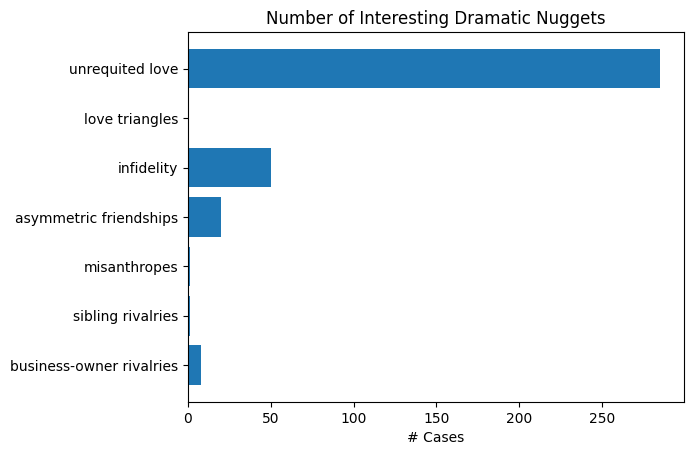

In [8]:
plt.rcdefaults()
fig, ax = plt.subplots()
categories = ('unrequited love', 'love triangles', 'infidelity', 
              'asymmetric friendships', 'misanthropes',
              'sibling rivalries', 'business-owner rivalries')
values = [
    len(unrequited_love_cases),
    len(love_triangles),
    len(extramarital_romantic_interests),
    len(asymmetric_friendships),
    len(misanthropes),
    len(sibling_rivalries),
    len(business_owner_rivalries)
]
y_pos = np.arange(len(categories))
ax.barh(y_pos, values, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(categories)
ax.invert_yaxis()
ax.set_xlabel("# Cases")
ax.set_title("Number of Interesting Dramatic Nuggets")

plt.show()